In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot  as plt
from matplotlib import font_manager
myfont = font_manager.FontProperties(fname=r".\utils\NotoSansCJK-Black.ttc")
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings

def ignore_warn(*args, **kwargs):
    pass

from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.preprocessing import LabelEncoder
from utils.append_external_data import concat_externaldata_concentric, concat_externaldata

In [2]:
train = pd.read_csv('./dataset/training_data.csv', sep=",")
test = pd.read_csv('./dataset/public_dataset.csv', sep=",")
# print(all_data.info())

In [3]:
ntrain = train.shape[0]
ntest = test.shape[0]
all_data = pd.concat((train, test)).reset_index(drop=True)
print(all_data.columns)

Index(['ID', '縣市', '鄉鎮市區', '路名', '土地面積', '使用分區', '移轉層次', '總樓層數', '主要用途',
       '主要建材', '建物型態', '屋齡', '建物面積', '車位面積', '車位個數', '橫坐標', '縱坐標', '備註',
       '主建物面積', '陽台面積', '附屬建物面積', '單價'],
      dtype='object')


In [4]:
"""New feature"""

### is_Top_floor
all_data['top_floor'] = np.where((all_data['總樓層數'] == all_data['移轉層次']), 1, 0)
### new_town = city + town
all_data['new_town'] = all_data['縣市'].apply(str) + '_' + all_data['鄉鎮市區'].apply(str)


In [5]:
"""One hot encoding"""
all_data["使用分區"] = all_data["使用分區"].fillna("None")
all_data["備註"] = all_data["備註"].fillna("None")
all_data.drop(['ID'], axis=1, inplace=True)
one_hot_cols = ['主要建材', '縣市', '總樓層數', '主要用途', '車位個數', '建物型態']
all_data = pd.get_dummies(all_data, columns=one_hot_cols)
print(all_data.select_dtypes(include=['object']))


      鄉鎮市區      路名  使用分區    備註 new_town
0      大安區  敦化南路二段  None  None  台北市_大安區
1      萬華區     水源路  None  None  台北市_萬華區
2      鳳山區     北忠街  None  None  高雄市_鳳山區
3      新莊區     福前街  None  None  新北市_新莊區
4      板橋區   文化路一段  None  None  新北市_板橋區
...    ...     ...   ...   ...      ...
17622  中西區  中華西路二段  None  None  台南市_中西區
17623   北區     育樂街  None  None   台中市_北區
17624  新店區   安康路二段  None  None  新北市_新店區
17625  信義區  忠孝東路五段  None  None  台北市_信義區
17626  中和區     中正路  None  None  新北市_中和區

[17627 rows x 5 columns]


In [6]:
category_col = ['鄉鎮市區', '路名', '使用分區', 'new_town']
for c in category_col:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

In [7]:
all_data['單價'] = np.log1p(all_data['單價'])

In [8]:
all_data = concat_externaldata(all_data, "./dataset/external_data/ATM資料.csv", 'ATM資料', radius=300.0)
all_data = concat_externaldata(all_data, "./dataset/external_data/大學基本資料.csv", '大學基本資料', radius=3000.0)
all_data = concat_externaldata(all_data, "./dataset/external_data/公車站點資料.csv", '公車站點資料', radius=300.0)
all_data = concat_externaldata(all_data, "./dataset/external_data/火車站點資料.csv", '火車站點資料', radius=3000.0)
all_data = concat_externaldata(all_data, "./dataset/external_data/金融機構基本資料.csv", '金融機構基本資料', radius=1000.0)
all_data = concat_externaldata(all_data, "./dataset/external_data/便利商店.csv", '便利商店', radius=300.0)
all_data = concat_externaldata(all_data, "./dataset/external_data/高中基本資料.csv", '高中基本資料', radius=3000.0)
all_data = concat_externaldata(all_data, "./dataset/external_data/國小基本資料.csv", '國小基本資料', radius=3000.0)
all_data = concat_externaldata(all_data, "./dataset/external_data/國中基本資料.csv", '國中基本資料', radius=3000.0)
all_data = concat_externaldata(all_data, "./dataset/external_data/捷運站點資料.csv", '捷運站點資料', radius=300.0)
all_data = concat_externaldata(all_data, "./dataset/external_data/郵局據點資料.csv", '郵局據點資料', radius=1000.0)
all_data = concat_externaldata(all_data, "./dataset/external_data/腳踏車站點資料.csv", '腳踏車站點資料', radius=300.0)
all_data = concat_externaldata(all_data, "./dataset/external_data/醫療機構基本資料.csv", '醫療機構基本資料', radius=3000.0)

In [9]:
# all_data = concat_externaldata_concentric(all_data, "./dataset/external_data/ATM資料.csv", 'ATM資料', radius=[100.0, 300.0, 500.0])
# all_data = concat_externaldata_concentric(all_data, "./dataset/external_data/大學基本資料.csv", '大學基本資料', radius=[1000.0, 1500.0, 3000.0])
# all_data = concat_externaldata_concentric(all_data, "./dataset/external_data/公車站點資料.csv", '公車站點資料', radius=[100.0, 200.0, 300.0])
# all_data = concat_externaldata_concentric(all_data, "./dataset/external_data/火車站點資料.csv", '火車站點資料', radius=[500.0, 1000.0, 3000.0])
# all_data = concat_externaldata_concentric(all_data, "./dataset/external_data/金融機構基本資料.csv", '金融機構基本資料', radius=[500.0, 750.0, 1000.0])
# all_data = concat_externaldata_concentric(all_data, "./dataset/external_data/便利商店.csv", '便利商店', radius=[100.0, 200.0, 300.0])
# all_data = concat_externaldata_concentric(all_data, "./dataset/external_data/高中基本資料.csv", '高中基本資料', radius=[1000.0, 1500.0, 3000.0])
# all_data = concat_externaldata_concentric(all_data, "./dataset/external_data/國小基本資料.csv", '國小基本資料', radius=[1000.0, 1500.0, 3000.0])
# all_data = concat_externaldata_concentric(all_data, "./dataset/external_data/國中基本資料.csv", '國中基本資料', radius=[1000.0, 1500.0, 3000.0])
# all_data = concat_externaldata_concentric(all_data, "./dataset/external_data/捷運站點資料.csv", '捷運站點資料', radius=[100.0, 200.0, 300.0])
# all_data = concat_externaldata_concentric(all_data, "./dataset/external_data/郵局據點資料.csv", '郵局據點資料', radius=[300.0, 500.0, 1000.0])
# all_data = concat_externaldata_concentric(all_data, "./dataset/external_data/腳踏車站點資料.csv", '腳踏車站點資料', radius=[100.0, 200.0, 300.0])
# all_data = concat_externaldata_concentric(all_data, "./dataset/external_data/醫療機構基本資料.csv", '醫療機構基本資料', radius=[500.0, 1000.0, 3000.0])

In [10]:
"""New feature --- V2"""

### is near the big road
all_data['is_street'] = all_data['路名'].astype(str).str.endswith('街').astype(int)
### how to use '備註'？
### way1: if there are 備註
all_data['備註'] = np.where((all_data['備註'] == 'None'), 1, 0)

In [11]:
train = all_data[:ntrain]
test = all_data[ntrain:].drop(['單價'], axis=1)
print(all_data.select_dtypes(include=['object']))

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[17627 rows x 0 columns]


In [12]:
# ### None: 1, others: 0
# note = np.where((train['備註'] == 'None'), 1, 0)
# price = np.array(train['單價'])
# fig, ax = plt.subplots()
# ax.scatter(x = note, y = price)
# plt.ylabel('單價', fontsize=13)
# plt.xlabel('備註', fontsize=13)
# plt.show()

In [13]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def MAPE(y, y_pred):
    return sum(abs(y_pred-y)/y)/len(y)

def Score(y, y_pred):
    y=np.expm1(y)
    y_pred=np.expm1(y_pred)
    hit_rate = np.around(np.sum(np.where(abs((y_pred-y)/y)<.1,1,0))/len(y),decimals=4)*10000
    MAPE = 1-np.sum(abs((y_pred-y)/y))/len(y)
    return hit_rate+MAPE

def Score_MAPE(y, y_pred):
    y=np.expm1(y)
    y_pred=np.expm1(y_pred)
#     hit_rate = np.around(np.sum(np.where(abs((y_pred-y)/y)<.1,1,0))/len(y),decimals=4)*10000
    MAPE = 1-np.sum(abs((y_pred-y)/y))/len(y)
    return MAPE

def Score_type(y, y_pred, h_type):
    y = np.expm1(y)
    y_pred = np.where(h_type>0,np.expm1(y_pred),0)
    hit_rate = np.around(np.sum(np.where(abs((y_pred-y)/y)<.1,1,0))/len(y),decimals=4)*10000
    MAPE = 1-np.sum(abs((y_pred-y)/y))/len(y)
    return hit_rate+MAPE

def Score_acc(y, y_pred, h_type):
    y = np.expm1(y)
    y_pred = np.where(h_type>0,np.expm1(y_pred),0)
    type_total = sum(np.where(h_type>0,1,0))
    hit_rate = np.sum(np.where(abs((y_pred-y)/y)<.1,1,0))/type_total
#     MAPE = 1-np.sum(abs((y_pred-y)/y))/len(y)
    return hit_rate#+MAPE

def Score2(y, y_pred):
    y=np.expm1(y)
    y_pred=np.expm1(y_pred)
#     hit_rate = np.around(np.sum(np.where(abs((y_pred-y)/y)<.1,1,0))/len(y),decimals=4)*10000
#     MAPE = 1-np.sum(abs((y_pred-y)/y))/len(y)
    hit_rate = np.sum(np.where(abs((y_pred-y)/y)<.1,1,0))/len(y)
    MAPE = np.around(1-np.sum(abs((y_pred-y)/y))/len(y),decimals=4)*10000
    return hit_rate+MAPE

n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [14]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingClassifier
from sklearn.svm import SVR

In [15]:
y_train = train['單價']
train = train.drop(['單價'], axis=1)
X_train, X_valid, train_y, valid_y = train_test_split(train, y_train, test_size=0.1, random_state=49)#42

In [16]:
valid=[(X_valid, valid_y)]

In [17]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials , partial

In [18]:
def check_result(search_result,param_space_list_2,n,plot_val=True,plot_tid=True,output_best = True):
    search_result.sort(key=lambda x : x["result"]["loss"]) # sort by search result
    
    for k in range(n):
        print("\nTop"+str(k+1)+" result :")
        print("val : ",search_result[k]["result"]["loss"])
        for i,j in search_result[k]["misc"]["vals"].items():
            print(i,param_space_list_2[i][j[0]])
    
    if plot_tid:
        print("\n")
        for i,j in param_space_list_2.items():
            if type(j) == type([]):
#                 print(i,j)
                f, ax = plt.subplots(1)
                xs = [param_space_list_2[i][t['misc']['vals'][i][0]] for t in search_result] 
                ys = [t["tid"] for t in search_result]
                ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
                ax.set_title('$t$ $vs$ '+i, fontsize=18)
                ax.set_xlabel(i, fontsize=16)
                ax.set_ylabel('$t$', fontsize=16)
                
    if plot_val:
        print("\n")
        for i,j in param_space_list_2.items():
            if type(j) == type([]):
                print(i,j)
                f, ax = plt.subplots(1)
                xs = [param_space_list_2[i][t['misc']['vals'][i][0]] for t in search_result] 
                ys = [t['result']['loss'] for t in search_result]
                ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
                ax.set_title('$val$ $vs$ '+i, fontsize=18)
                ax.set_xlabel(i, fontsize=16)
                ax.set_ylabel('$val$', fontsize=16)
    if output_best:
        best_result_param = param_space_list_2.copy()
        for i,j in search_result[0]["misc"]["vals"].items():
            best_result_param[i] = param_space_list_2[i][j[0]]
        return best_result_param

In [19]:
param_space_list = {
"boosting_type" : 'gbdt',
"objective" : 'regression',
"metric" : 'mape',
"learning_rate" : 0.01, 
"n_estimators" : 30000,
"num_leaves" : [250,300,350,375,400,425,450,500,550], 
"max_depth" : [-1], #[-1,4,5,6,7,8], 
"max_bin" : [ 250, 255, 300, 350,375, 400,425, 450, 500, 550, 600],
"min_data_in_leaf" : [0,1,2,3], 
"bagging_fraction" : [0.7,0.72,0.74,0.76,0.77,0.78,0.79,0.8,0.82,0.84,0.86], 
"bagging_freq" : [4,5,6,7, 10,12, 15], 
"feature_fraction" : [0.4,0.5,0.55,0.6,0.65,0.7,0.8], 
"feature_fraction_seed" : 9, 
"bagging_seed" : 9, 
"reg_lambda" : [1e-3,0.0,0.03,0.05,0.07,0.1,0.15],
"reg_alpha" : [1e-3,0.0,0.03,0.05,0.07,0.1,0.15],
# "min_split_gain" : [1e-5,1e-3,0.0,0.1,0.2,0.3,0.4,0.5],
"min_sum_hessian_in_leaf" : [0,1,2,3,4,5,6,7,8,9,10]
}

In [20]:
param_space_hyper = {
"boosting_type" : 'gbdt',
"objective" : 'regression',
"metric" : 'mape',
"learning_rate" : 0.01, 
"n_estimators" : 30000,
"num_leaves" :  hp.choice("num_leaves",[50,300,350,375,400,425,450,500,550]), 
"max_depth" : hp.choice("max_depth"  ,[-1]), 
"max_bin" :  hp.choice("max_bin" ,[ 250, 255, 300, 350,375, 400,425, 450, 500, 550, 600]),
"min_data_in_leaf" : hp.choice( "min_data_in_leaf" ,[0,1,2,3]), 
"bagging_fraction" : hp.choice("bagging_fraction" ,[0.7,0.72,0.74,0.76,0.77,0.78,0.79,0.8,0.82,0.84,0.86]), 
"bagging_freq" :  hp.choice("bagging_freq" ,[4,5,6,7, 10,12, 15]), 
"feature_fraction" :  hp.choice("feature_fraction" ,[0.4,0.5,0.55,0.6,0.65,0.7,0.8]), 
"feature_fraction_seed" : 9, 
"bagging_seed" : 9, 
"reg_lambda" :  hp.choice("reg_lambda" ,[1e-3,0.0,0.03,0.05,0.07,0.1,0.15]),
"reg_alpha" : hp.choice( "reg_alpha" ,[1e-3,0.0,0.03,0.05,0.07,0.1,0.15]),
# "min_split_gain" :  hp.choice("min_split_gain" ,[1e-5,1e-3,0.0,0.1,0.2,0.3,0.4,0.5]),
"min_sum_hessian_in_leaf" : hp.choice("min_sum_hessian_in_leaf" ,[0,1,2,3,4,5,6,7,8,9,10])
}

In [21]:
import datetime
from lightgbm import log_evaluation, early_stopping
def lgb_fine_tune(argsDict):
    
    model_lgb = lgb.LGBMRegressor(**argsDict, early_stopping_rounds=150, verbose=1)
    
    starttime = datetime.datetime.now()
    model_lgb.fit(X_train,train_y, eval_set=valid,eval_metric='mape')
    
    endtime = datetime.datetime.now()
    print ("Step_time:{}".format(endtime - starttime))
    lgb_valid_pred = model_lgb.predict(X_valid)
    lgb_train_pred = model_lgb.predict(train)
    rmsle_train = rmsle(y_train, lgb_train_pred)
    rmsle_valid = rmsle(valid_y, lgb_valid_pred)
    Score_train = Score(y_train, lgb_train_pred)
    Score_valid = Score(valid_y, lgb_valid_pred) 
    Score_MAPE_valid = Score_MAPE(valid_y, lgb_valid_pred) 
    mape_train = MAPE(y_train, lgb_train_pred)
    mape_valid = MAPE(valid_y, lgb_valid_pred)
    val = Score_MAPE_valid
    
    print("rmsle_train(val) = %.4f, rmsle_valid = %.4f, mape_valid = %.4f, Score_train = %.4f, Score_valid = %.4f \n"%(rmsle_train, rmsle_valid, Score_MAPE_valid*1000, Score_train,Score_valid))
    
    return {'loss': -val, 'status': STATUS_OK}

In [22]:
trials = Trials()

algo = partial(tpe.suggest,n_startup_jobs=1)
best = fmin(lgb_fine_tune,param_space_hyper,algo=algo,max_evals=50, trials=trials)
print(best)

[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] feature_fraction is set=0.65, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.65
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] bagging_fraction is set=0.86, subsample=1.0 will be ignored. Current value: bagging_fraction=0.86
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] early_stopping_round is set=150, early_stopping_rounds=150 will be ignored. Current value: early_stopping_round=150
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] feature_fraction is set=0.65, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.65
[LightGB

[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] early_stopping_round is set=150, early_stopping_rounds=150 will be ignored. Current value: early_stopping_round=150
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] bagging_fraction is set=0.76, subsample=1.0 will be ignored. Current value: bagging_fraction=0.76
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] bagging_fraction is set=0.76, subsample=1.0 will be ignored. Current value: bagging_fraction=0.76
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
rmsle_train(val) = 0.0246, rmsle_valid = 0.0775, mape_valid = 904.5812, Score_train = 9695.9884, Score_valid = 6956.9046 

[LightGBM] [Warning] min_data_in_leaf is se

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
Early stopping, best iteration is:                                               
[4729]	valid_0's mape: 0.0463694
Step_time:0:00:43.118913                                                         
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [W

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] bagging_fraction is set=0.76, subsample=1.0 will be ignored. Current value: bagging_fraction=0.76
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.76, subsample=1.0 will be ignored. Current value: bagging_fraction=0.76
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
rmsle_train(val) = 0.0251, rmsle_valid = 0.0781, mape_valid = 905.4245, Score_train = 9694.9859, Score_valid = 6956.9054 

[LightGBM] [Warning] min_data_in_leaf i

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.82, subsample=1.0 will be ignored. Current value: bagging_fraction=0.82
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002265 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4867                                                
[LightGBM] [Info] Number of data points in the train set: 10575, number of used features: 108
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] feature_fraction is set=0.7, colsa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

Early stopping, best iteration is:                                               
[6585]	valid_0's mape: 0.0463772
Step_time:0:00:48.682654                                                         
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.82, subsample=1.0 will be ignored. Current value: bagging_fraction=0.82
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will 

[LightGBM] [Info] Start training from score 1.050492                             
Training until validation scores don't improve for 150 rounds                    
Early stopping, best iteration is:                                               
[2264]	valid_0's mape: 0.0469564
Step_time:0:00:29.857743                                                         
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] bagging_fraction is set=0.72, subsample=1.0 will be ignored. Current value: bagging_fraction=0.72
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] min_data_

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7626                                                 
[LightGBM] [Info] Number of data points in the train set: 10575, number of used features: 116
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] bagging_fraction is set=0.7, subs

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] bagging_fraction is set=0.76, subsample=1.0 will be ignored. Current value: bagging_fraction=0.76
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5708                                                 
[LightGBM] [Info] Number of data points in the train set: 10575, number of used features: 116
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] bagging_fraction is set=0.76, sub

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] bagging_fraction is set=0.78, subsample=1.0 will be ignored. Current value: bagging_fraction=0.78
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] early_stopping_round is set=150, early_stopping_rounds=150 will be ignored. Current value: early_stopping_round=150
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] bagging_fraction is set=0.78, subsample=1.0 will be ignored. Current value: bagging_fraction=0.78
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Info] Auto-ch

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5967                                                 
[LightGBM] [Info] Number of data points in the train set: 10575, number of used features: 108
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=10, subsample

[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5967                                                 
[LightGBM] [Info] Number of data points in the train set: 10575, number of used features: 108
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.7, subs

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] bagging_fraction is set=0.79, subsample=1.0 will be ignored. Current value: bagging_fraction=0.79
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] early_stopping_round is set=150, early_stopping_rounds=150 will be ignored. Current value: early_stopping_round=150
[LightGBM] [Info] Start training from score 1.050492                              
Training until validation scores don't improve for 150 rounds                     
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[L

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] bagging_fraction is set=0.84, subsample=1.0 will be ignored. Current value: bagging_fraction=0.84
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002634 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5158                                                 
[LightGBM] [Info] Number of data points in the train set: 10575, number of used features: 116
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] feature_fraction is set=0.7, cols

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
Earl

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] bagging_fraction is set=0.82, subsample=1.0 will be ignored. Current value: bagging_fraction=0.82
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0
[LightGBM] [Warning] bagging_fraction is set=0.82, subsample=1.0 will be ignored. Current value: bagging_fraction=0.82
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
rmsle_train(val) = 0.0247, rmsle_valid = 0.0779, mape_valid = 904.1048, Score_train = 9689.9885, Score_valid = 6888.9041 

[LightGBM] [Warning] min_data_in_leaf is se

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] bagging_fraction is set=0.74, subsample=1.0 will be ignored. Current value: bagging_fraction=0.74
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] early_stopping_round is set=150, early_stopping_rounds=150 will be ignored. Current value: early_stopping_round=150
[LightGBM] [Info] Start training from score 1.050492                              
Training until validation scores don't improve for 150 rounds                     
Early stopping, best iteration is:                                                
[8040]	valid_0's mape: 0.047142
Step_time:0:00:14.659250                                                          
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Wa

[LightGBM] [Warning] feature_fraction is set=0.65, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.65
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] bagging_fraction is set=0.77, subsample=1.0 will be ignored. Current value: bagging_fraction=0.77
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] early_stopping_round is set=150, early_stopping_rounds=150 will be ignored. Current value: early_stopping_round=150
[LightGBM] [Info] Start training from score 1.050492                              
Training until validation scores don't improve for 150 rounds                     
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits wit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] feature_fraction is set=0.65, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.65
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] bagging_fraction is set=0.77, subsample=1.0 will be ignored. Current value: bagging_fraction=0.77
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
rmsle_train(val) = 0.0252, rmsle_valid = 0.0778, mape_valid = 904.2026, Score_train = 9705.9849, Score_valid = 7058.9042 

[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
Early stopping, best iteration is:                                                
[3783]	valid_0's mape: 0.0464652
Step_time:0:00:32.362153                                                          
[LightGBM] [Warning] min_data_in_leaf is set=0, min_ch

[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] bagging_fraction is set=0.78, subsample=1.0 will be ignored. Current value: bagging_fraction=0.78
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] early_stopping_round is set=150, early_stopping_rounds=150 will be ignored. Current value: early_stopping_round=150
[LightGBM] [Info] Start training from score 1.050492                              
Training until validation scores don't improve for 150 rounds                     
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] bagging_fraction is set=0.76, subsample=1.0 will be ignored. Current value: bagging_fraction=0.76
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] early_stopping_round is set=150, early_stopping_rounds=150 will be ignored. Current value: early_stopping_round=150
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] feature_fraction is set=0.55, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.55
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] bagging_fraction is set=0.76, subsample=1.0 will be ignored. Current value: bagging_fraction=0.76

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] early_stopping_round is set=150, early_stopping_rounds=150 will be ignored. Current value: early_stopping_round=150
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] feature_fraction is set=0.65, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.65
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] bagging_fraction is set=0.74, subsample=1.0 will be ignored. Current value: bagging_fraction=0.74
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] early_stopping_round is set=150, early_stopping_rounds=150 will be ignored. Current value: early_stopping_round=150
[LightGBM] [Info] Start training from score 1.050492                              
Training until validation scores don't improve for 150 rounds                     
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] early_stopping_round is set=150, early_stopping_rounds=150 will be ignored. Current value: early_stopping_round=150
[LightGBM] [Info] Start training from score 1.050492                              
Training until validation scores don't improve for 150 rounds                     
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGB

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] bagging_fraction is set=0.86, subsample=1.0 will be ignored. Current value: bagging_fraction=0.86
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] early_stopping_round is set=150, early_stopping_rounds=150 will be ignored. Current value: early_stopping_round=150
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] feature_fraction is set=0.55, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.55
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] bagging_fraction is set=0.86, subsample=1.0 will be ignored. Current value: bagging_fraction=0.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.76, subsample=1.0 will be ignored. Current value: bagging_fraction=0.76
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5967                                                 
[LightGBM] [Info] Number of data points in the train set: 10575, number of used features: 108
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] feature_fraction is set=0.7, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
Early stopping, best iteration is:                                                
[5516]	valid_0's mape: 0.0472918
Step_time:0:00:46.239452                                                          
[LightGBM] [Warning] min_data_in_leaf is set=0, min_ch

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

Early stopping, best iteration is:                                                
[2507]	valid_0's mape: 0.0459957
Step_time:0:00:35.014441                                                          
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] bagging_fraction is set=0.77, subsample=1.0 will be ignored. Current value: bagging_fraction=0.77
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 w

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf        
[Lig

[LightGBM] [Warning] bagging_fraction is set=0.84, subsample=1.0 will be ignored. Current value: bagging_fraction=0.84
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] bagging_fraction is set=0.84, subsample=1.0 will be ignored. Current value: bagging_fraction=0.84
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
rmsle_train(val) = 0.0269, rmsle_valid = 0.0780, mape_valid = 904.4558, Score_train = 9688.9798, Score_valid = 6947.9045 

100%|██████████| 50/50 [30:17<00:00, 36


Top1 result :
val :  -0.9055713821033881
bagging_fraction 0.77
bagging_freq 12
feature_fraction 0.8
max_bin 600
max_depth -1
min_data_in_leaf 2
min_sum_hessian_in_leaf 8
num_leaves 375
reg_alpha 0.05
reg_lambda 0.15

Top2 result :
val :  -0.9054245451867238
bagging_fraction 0.76
bagging_freq 10
feature_fraction 0.8
max_bin 450
max_depth -1
min_data_in_leaf 3
min_sum_hessian_in_leaf 1
num_leaves 550
reg_alpha 0.07
reg_lambda 0.15

Top3 result :
val :  -0.9050313011873174
bagging_fraction 0.77
bagging_freq 4
feature_fraction 0.8
max_bin 450
max_depth -1
min_data_in_leaf 3
min_sum_hessian_in_leaf 2
num_leaves 550
reg_alpha 0.07
reg_lambda 0.15

Top4 result :
val :  -0.9048980676594061
bagging_fraction 0.77
bagging_freq 4
feature_fraction 0.8
max_bin 300
max_depth -1
min_data_in_leaf 3
min_sum_hessian_in_leaf 6
num_leaves 400
reg_alpha 0.07
reg_lambda 0.15


num_leaves [250, 300, 350, 375, 400, 425, 450, 500, 550]
max_depth [-1]
max_bin [250, 255, 300, 350, 375, 400, 425, 450, 500, 550, 6

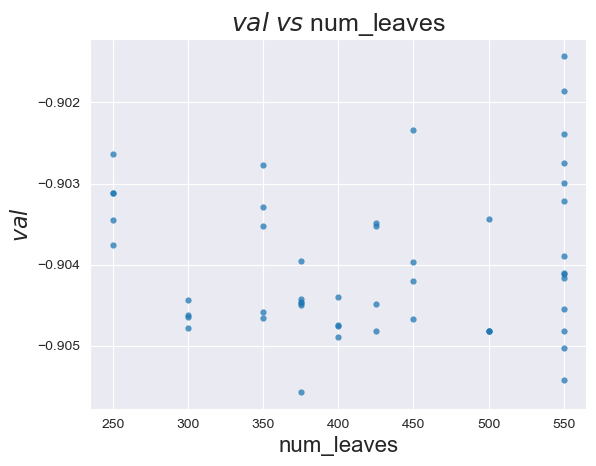

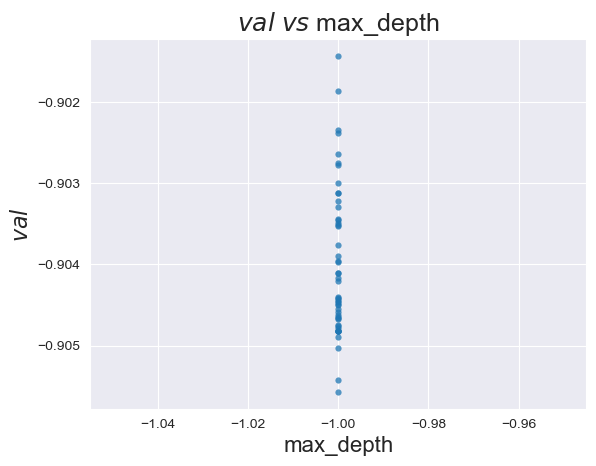

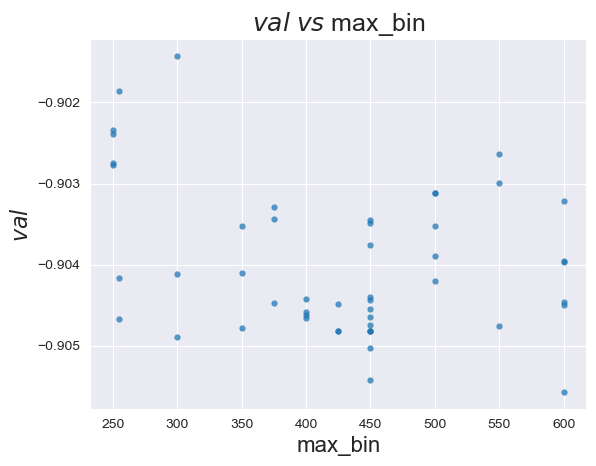

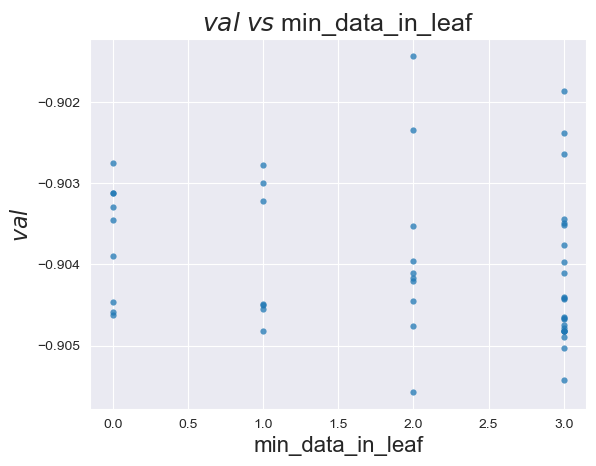

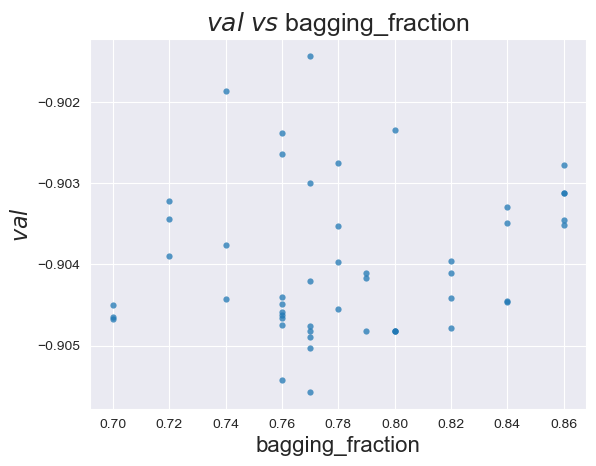

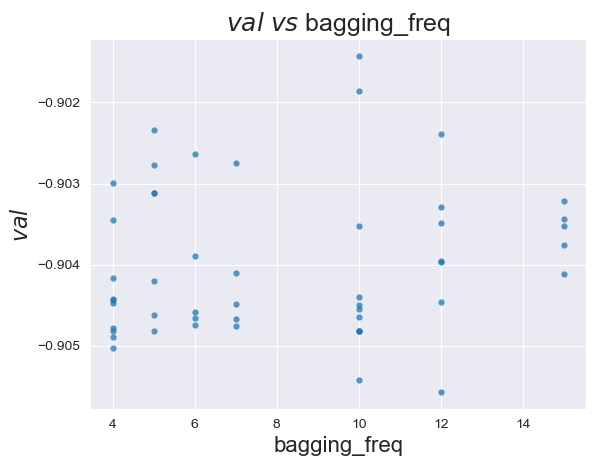

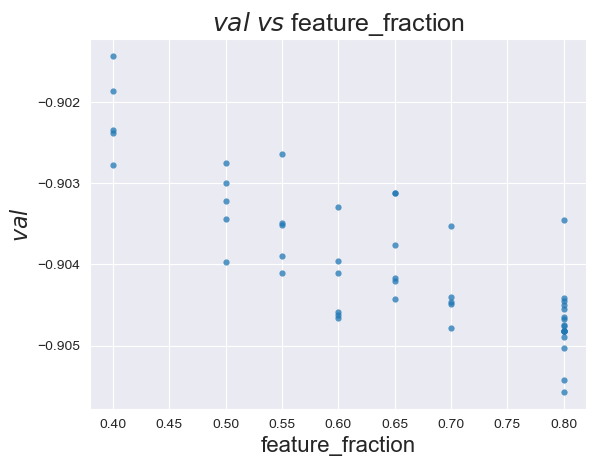

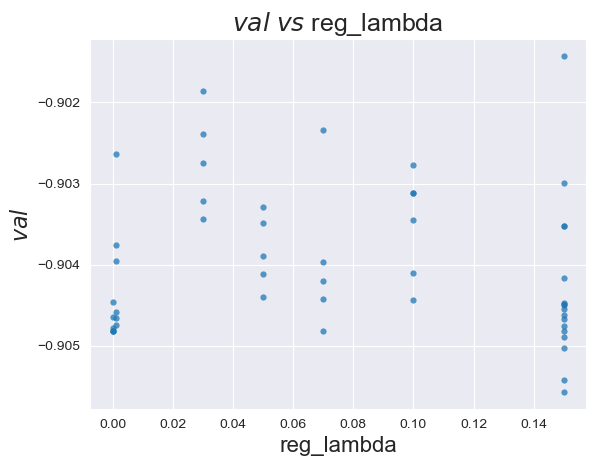

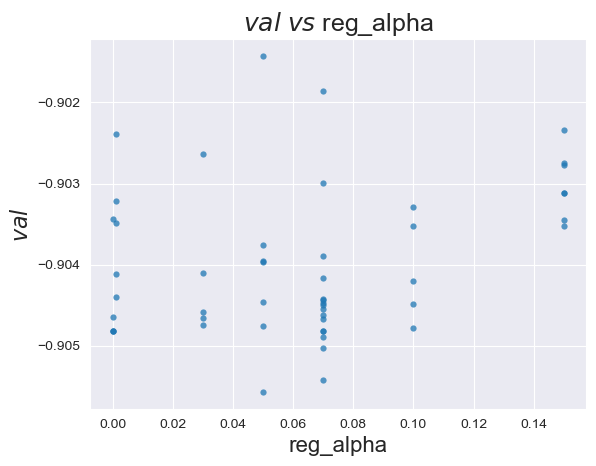

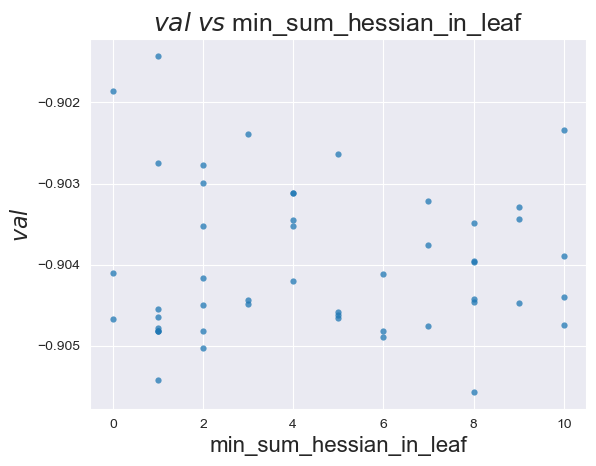

In [23]:
aa = check_result(trials.trials,param_space_list,n=4,plot_val=True,plot_tid=False,output_best = True)

In [24]:
aa

{'boosting_type': 'gbdt',
 'objective': 'regression',
 'metric': 'mape',
 'learning_rate': 0.01,
 'n_estimators': 30000,
 'num_leaves': 375,
 'max_depth': -1,
 'max_bin': 600,
 'min_data_in_leaf': 2,
 'bagging_fraction': 0.77,
 'bagging_freq': 12,
 'feature_fraction': 0.8,
 'feature_fraction_seed': 9,
 'bagging_seed': 9,
 'reg_lambda': 0.15,
 'reg_alpha': 0.05,
 'min_sum_hessian_in_leaf': 8}

In [25]:
model_lgb = lgb.LGBMRegressor(**aa, early_stopping_rounds=150, verbose=0)
model_lgb.fit(X_train,train_y, eval_set=valid,eval_metric='mape')

[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] bagging_fraction is set=0.77, subsample=1.0 will be ignored. Current value: bagging_fraction=0.77
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] early_stopping_round is set=150, early_stopping_rounds=150 will be ignored. Current value: early_stopping_round=150
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMRegressor(bagging_fraction=0.77, bagging_freq=12, bagging_seed=9,
              early_stopping_rounds=150, feature_fraction=0.8,
              feature_fraction_seed=9, learning_rate=0.01, max_bin=600,
              metric='mape', min_data_in_leaf=2, min_sum_hessian_in_leaf=8,
              n_estimators=30000, num_leaves=375, objective='regression',
              reg_alpha=0.05, reg_lambda=0.15, verbose=0)

In [26]:
lgb_valid_pred = model_lgb.predict(X_valid)
lgb_train_pred = model_lgb.predict(train)
print(rmsle(valid_y, lgb_valid_pred))
print(MAPE(valid_y, lgb_valid_pred))
print(Score(valid_y, lgb_valid_pred))
print(Score(y_train, lgb_train_pred))

[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] bagging_fraction is set=0.77, subsample=1.0 will be ignored. Current value: bagging_fraction=0.77
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] 

In [32]:
"""without external data
model_lgb = lgb.LGBMRegressor(bagging_fraction=0.77, bagging_freq=4, bagging_seed=9,
              early_stopping_rounds=150, feature_fraction=0.8,
              feature_fraction_seed=9, learning_rate=0.01, max_bin=550,
              metric='mape', min_data_in_leaf=1, min_sum_hessian_in_leaf=5,
              n_estimators=30000, num_leaves=350, objective='regression',
              verbose=0)
model_lgb.fit(X_train,train_y, eval_set=valid,eval_metric='mape')
"""

"""
### With external data###
model_lgb = lgb.LGBMRegressor(bagging_fraction=0.84, bagging_freq=4, bagging_seed=9,
              early_stopping_rounds=150, feature_fraction=0.8,
              feature_fraction_seed=9, learning_rate=0.01, max_bin=300,
              metric='mape', min_data_in_leaf=2, min_sum_hessian_in_leaf=2,
              n_estimators=30000, num_leaves=375, objective='regression',
              reg_alpha=0.03, reg_lambda=0.07, verbose=0)
model_lgb.fit(X_train,train_y, eval_set=valid,eval_metric='mape')
"""

"""
### With external data and more features and cocentric
model_lgb = lgb.LGBMRegressor(bagging_fraction=0.72, bagging_freq=4, bagging_seed=9,
              early_stopping_rounds=150, feature_fraction=0.7,
              feature_fraction_seed=9, learning_rate=0.01, max_bin=425,
              metric='mape', min_data_in_leaf=2, min_sum_hessian_in_leaf=10,
              n_estimators=30000, num_leaves=350, objective='regression',
              reg_lambda=0.15, verbose=0)
model_lgb.fit(X_train,train_y, eval_set=valid,eval_metric='mape')
"""

### With external data and more features and without cocentric
model_lgb = lgb.LGBMRegressor(bagging_fraction=0.77, bagging_freq=12, bagging_seed=9,
              early_stopping_rounds=150, feature_fraction=0.8,
              feature_fraction_seed=9, learning_rate=0.01, max_bin=600,
              metric='mape', min_data_in_leaf=2, min_sum_hessian_in_leaf=8,
              n_estimators=30000, num_leaves=375, objective='regression',
              reg_alpha=0.05, reg_lambda=0.15, verbose=0)
model_lgb.fit(X_train,train_y, eval_set=valid,eval_metric='mape')

[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] bagging_fraction is set=0.77, subsample=1.0 will be ignored. Current value: bagging_fraction=0.77
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] early_stopping_round is set=150, early_stopping_rounds=150 will be ignored. Current value: early_stopping_round=150
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMRegressor(bagging_fraction=0.77, bagging_freq=12, bagging_seed=9,
              early_stopping_rounds=150, feature_fraction=0.8,
              feature_fraction_seed=9, learning_rate=0.01, max_bin=600,
              metric='mape', min_data_in_leaf=2, min_sum_hessian_in_leaf=8,
              n_estimators=30000, num_leaves=375, objective='regression',
              reg_alpha=0.05, reg_lambda=0.15, verbose=0)

In [33]:
lgb_valid_pred = model_lgb.predict(X_valid)
lgb_train_pred = model_lgb.predict(train)
print(rmsle(valid_y, lgb_valid_pred))
print(MAPE(valid_y, lgb_valid_pred))
print(Score(valid_y, lgb_valid_pred))
print(Score(y_train, lgb_train_pred))

[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] bagging_fraction is set=0.77, subsample=1.0 will be ignored. Current value: bagging_fraction=0.77
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] 

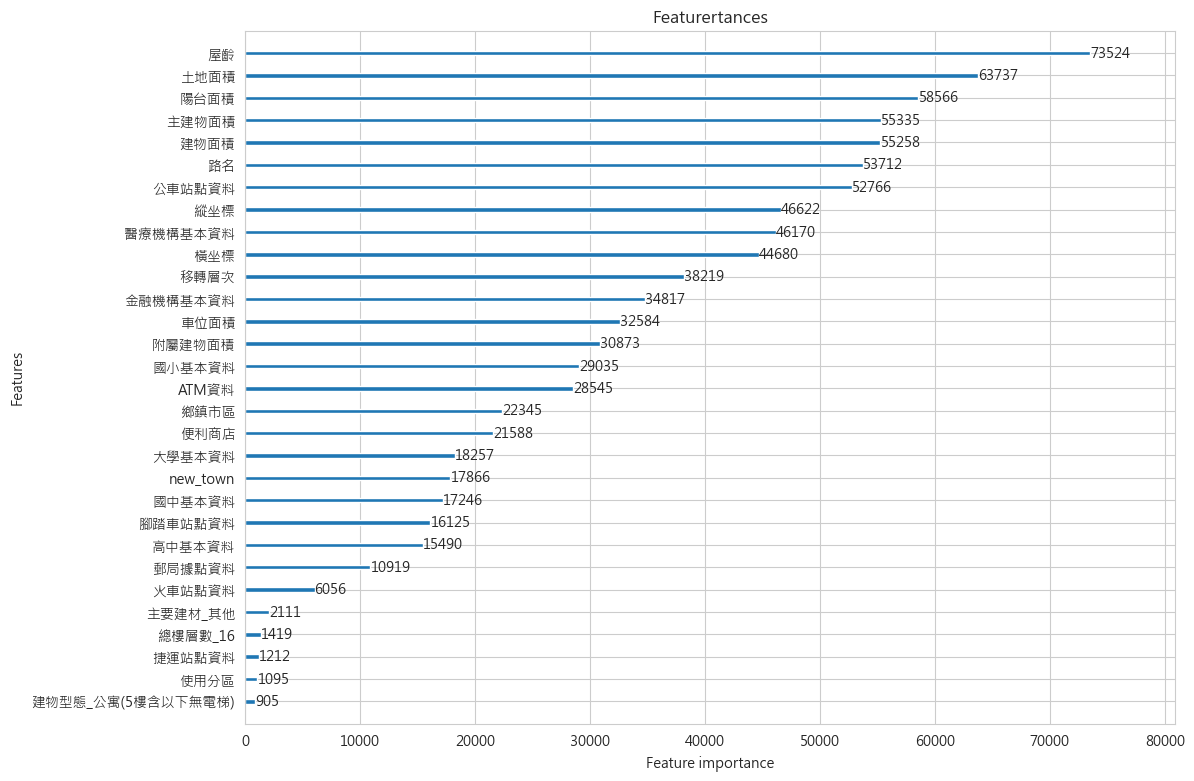

In [34]:
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})
lgb.plot_importance(model_lgb, max_num_features=30, figsize=(12,9))

plt.title("Featurertances")
plt.show()

In [30]:
lgb_pred = np.expm1(model_lgb.predict(test.values))

[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.72, subsample=1.0 will be ignored. Current value: bagging_fraction=0.72
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


In [31]:

import csv
### Output the predict result to output.csv, the format is corrent (checked)
with open('output.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['ID', 'predicted_price'])

    for i, pred in enumerate(lgb_pred):
        writer.writerow(['PU-' + str(i+1), pred])
